In [1]:
import zillow_wrangle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import scipy.stats as stats

<h3>Exercises:</h3>

__Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:__

Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

__Answer those questions through a mix of statistical tests and visualizations.__

<h4>Bonus:</h4>

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

Questions:

- univariate: What are the distribution of each variable?

- bivariate: Is there a relationship between lot size and logerror?

- bivariate: Is there a relationship between home size and logerror?

- bivariate: Does the logerror score vary by county(fips)?

- multivariate: If we control year built, does the logerror differ by county(fips)?






In [2]:
# acquire zillow data
df = zillow_wrangle.get_zillow_data()
df

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77376,673515,11000655,NaN,NaN,NaN,2.0,2.0,NaN,6.0,2.0,...,6.037101e+13,0.020615,2017-09-20,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
77377,2968375,17239384,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,6.111008e+13,0.013209,2017-09-21,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
77378,1843709,12773139,1.0,NaN,NaN,1.0,3.0,NaN,4.0,1.0,...,6.037434e+13,0.037129,2017-09-21,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN
77379,1187175,12826780,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,6.037503e+13,0.007204,2017-09-25,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [3]:
# prepare data
df = zillow_wrangle.prepare_zillow(df)
df

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc,county
0,1727539,14297519,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,...,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,Single Family Residential,Orange
1,1387261,17052889,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,...,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,Single Family Residential,Ventura
2,11677,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,...,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,Single Family Residential,Orange
3,2288172,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,...,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Single Family Residential,Los Angeles
4,1970746,10887214,3.0,3.0,3.0,1312.0,1312.0,6037.0,3.0,34185120.0,...,73681.0,119407.0,2016.0,45726.0,1533.89,6.037124e+13,0.006940,2017-01-01,Condominium,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77376,673515,11000655,2.0,2.0,2.0,1286.0,1286.0,6037.0,2.0,34245368.0,...,70917.0,354621.0,2016.0,283704.0,4478.43,6.037101e+13,0.020615,2017-09-20,Single Family Residential,Los Angeles
77377,2968375,17239384,2.0,4.0,2.0,1612.0,1612.0,6111.0,2.0,34300140.0,...,50683.0,67205.0,2016.0,16522.0,1107.48,6.111008e+13,0.013209,2017-09-21,Single Family Residential,Ventura
77378,1843709,12773139,1.0,3.0,1.0,1032.0,1032.0,6037.0,1.0,34040895.0,...,32797.0,49546.0,2016.0,16749.0,876.43,6.037434e+13,0.037129,2017-09-21,Single Family Residential,Los Angeles
77379,1187175,12826780,2.0,3.0,2.0,1762.0,1762.0,6037.0,2.0,33937685.0,...,140000.0,522000.0,2016.0,382000.0,6317.15,6.037503e+13,0.007204,2017-09-25,Single Family Residential,Los Angeles


In [4]:
df.value_counts('propertylandusedesc')

propertylandusedesc
Single Family Residential                     48481
Condominium                                   19193
Cluster Home                                    333
Mobile Home                                      61
Manufactured, Modular, Prefabricated Homes       51
Townhouse                                         6
dtype: int64

In [5]:
# view column names
df.columns.tolist()

['id',
 'parcelid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'logerror',
 'transactiondate',
 'propertylandusedesc',
 'county']

In [6]:
# split the data by calling split function
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = zillow_wrangle.split_zillow(df, 'logerror')

1. Univariate: What are the distribution of each variable?

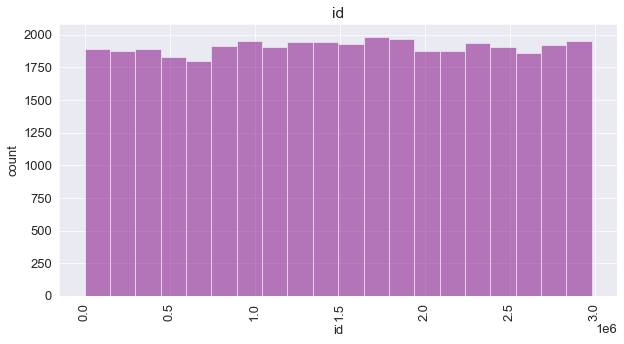

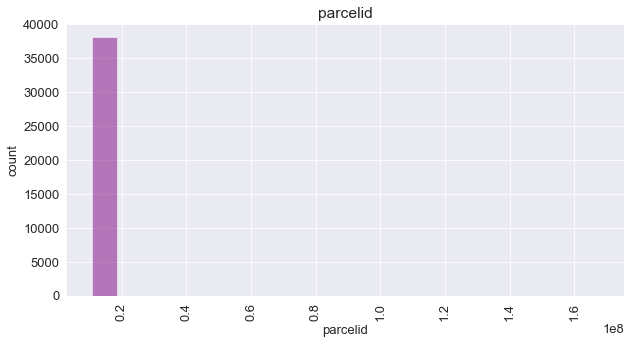

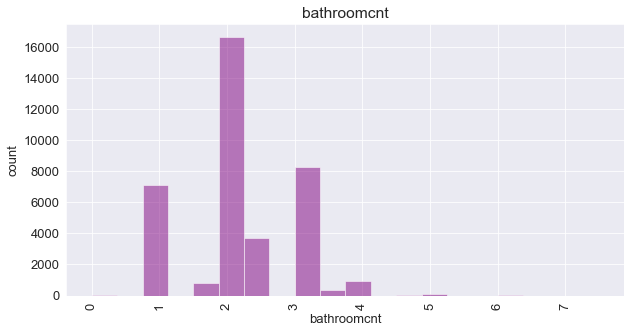

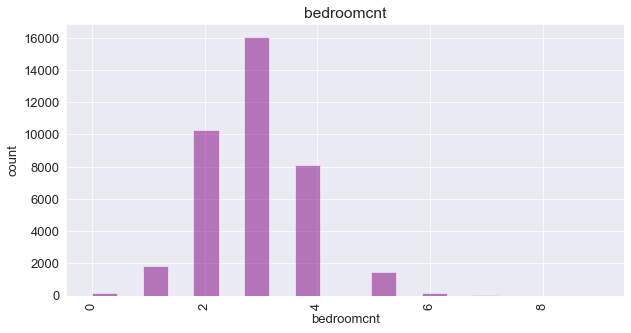

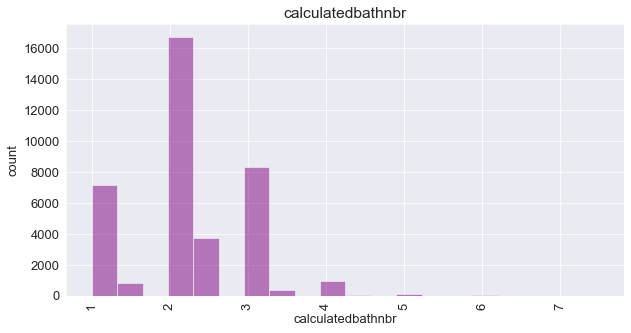

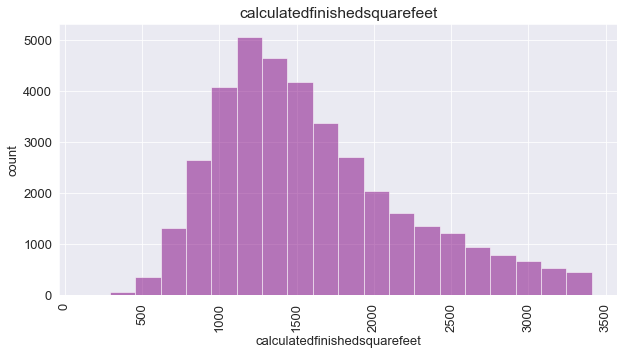

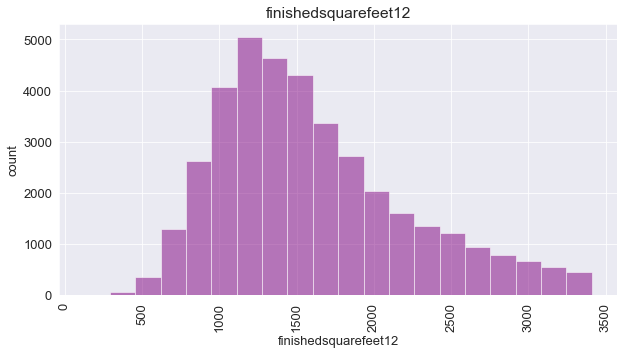

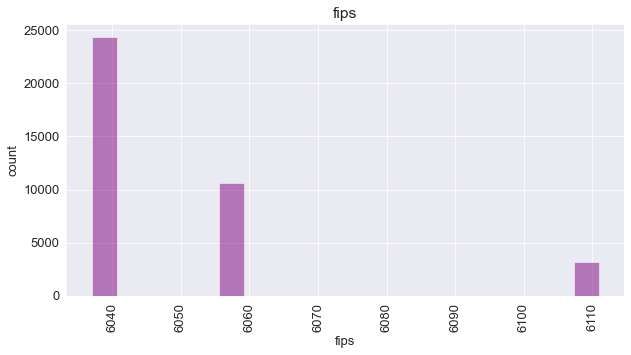

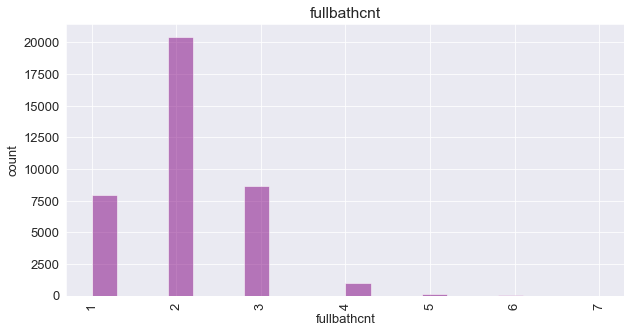

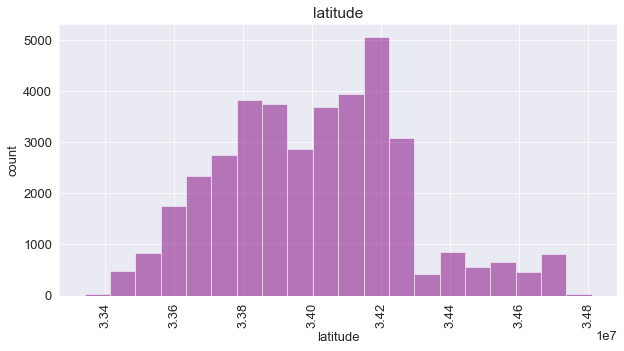

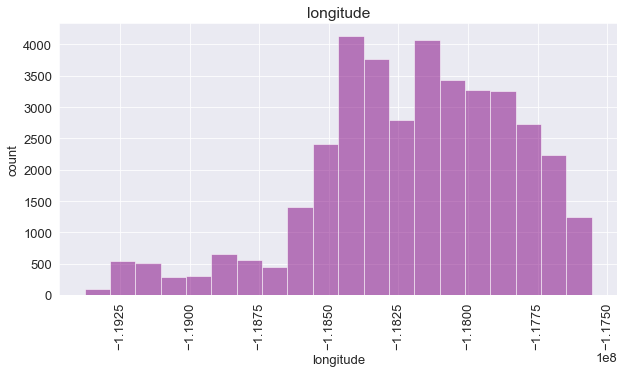

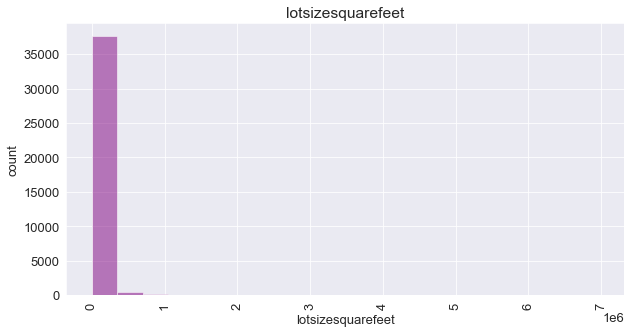

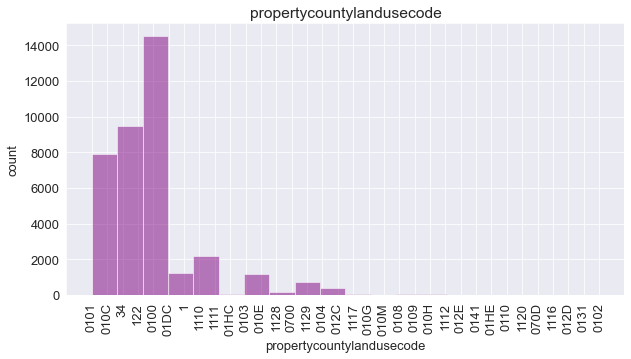

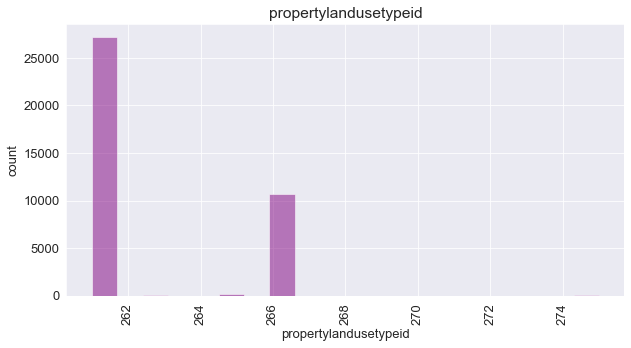

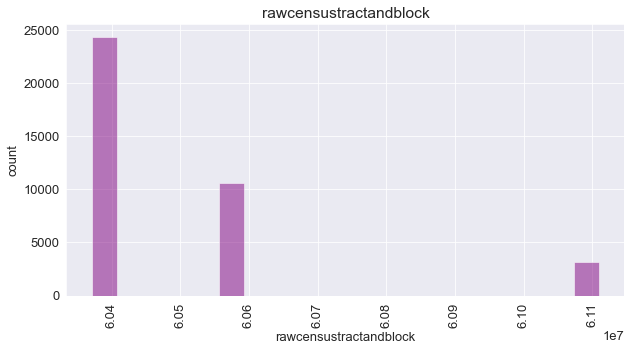

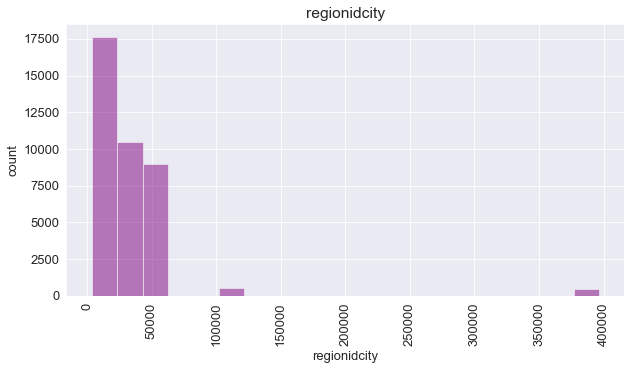

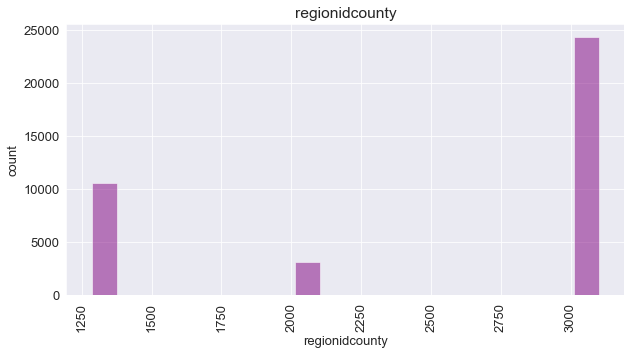

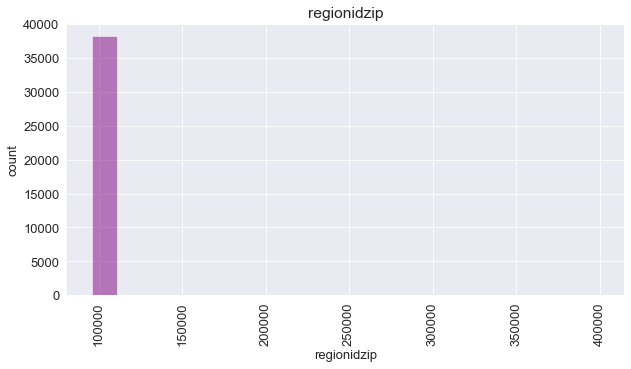

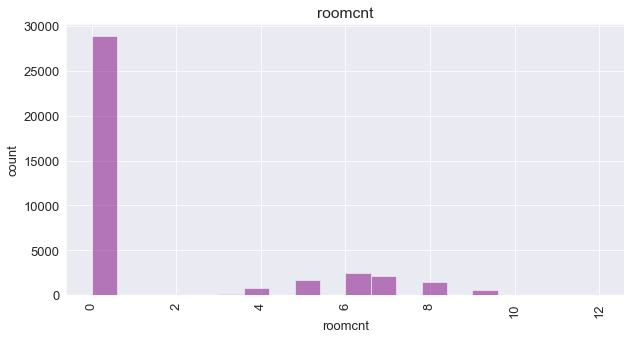

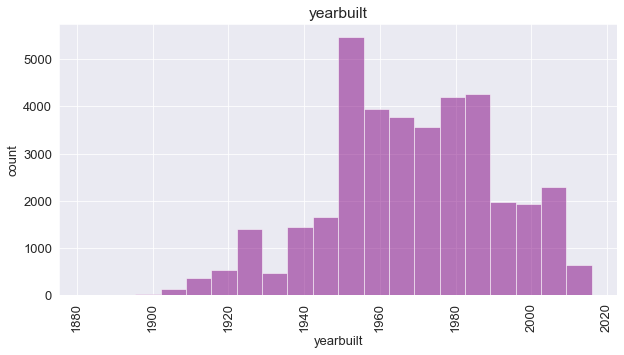

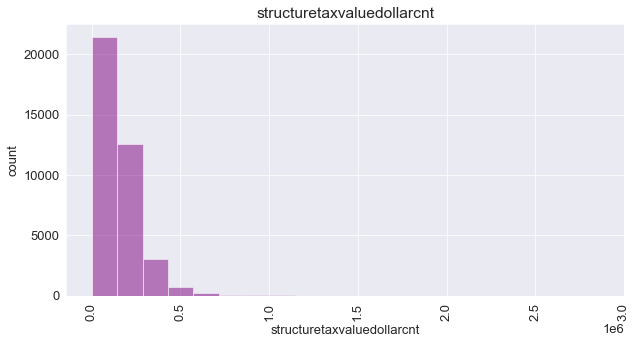

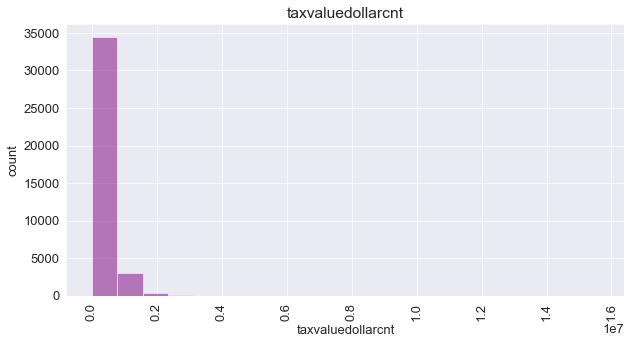

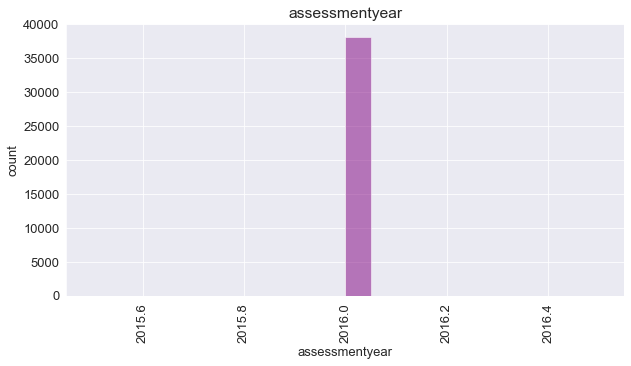

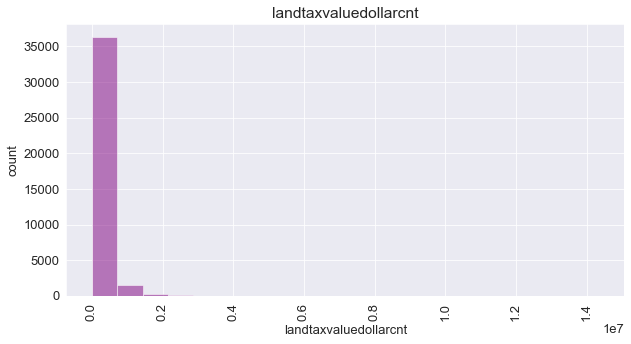

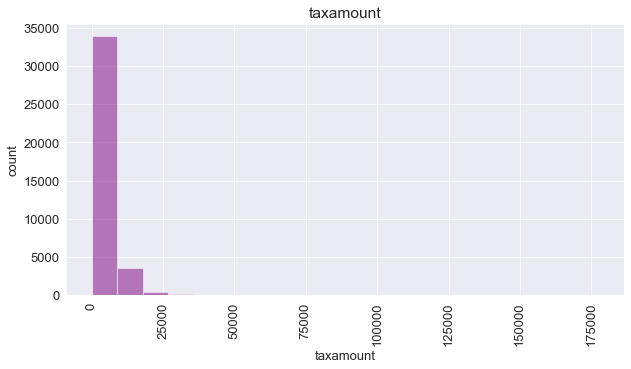

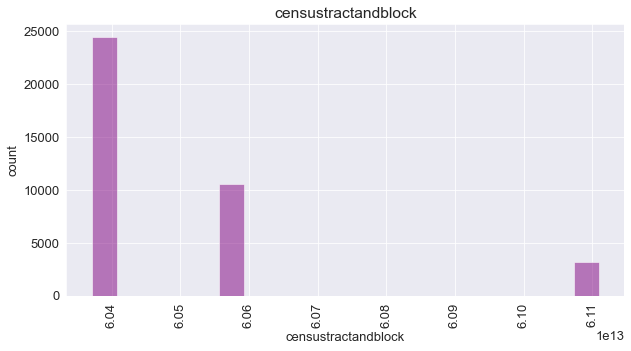

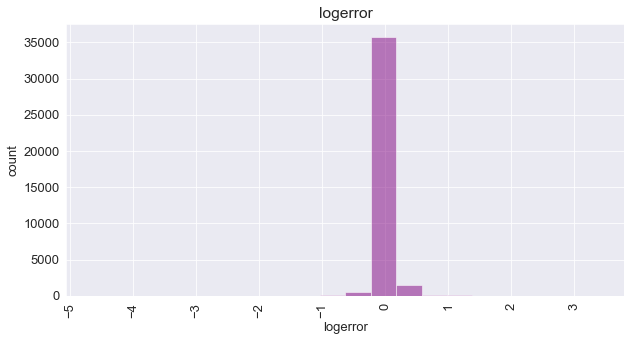

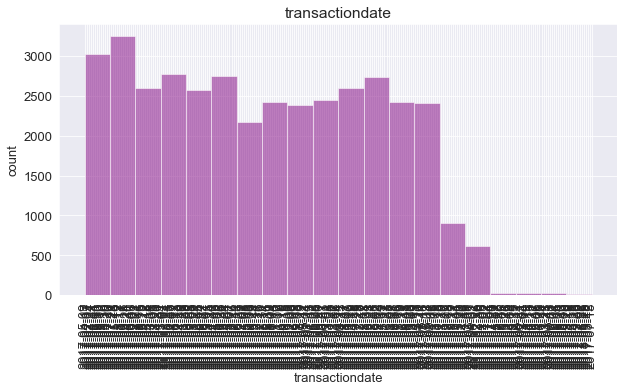

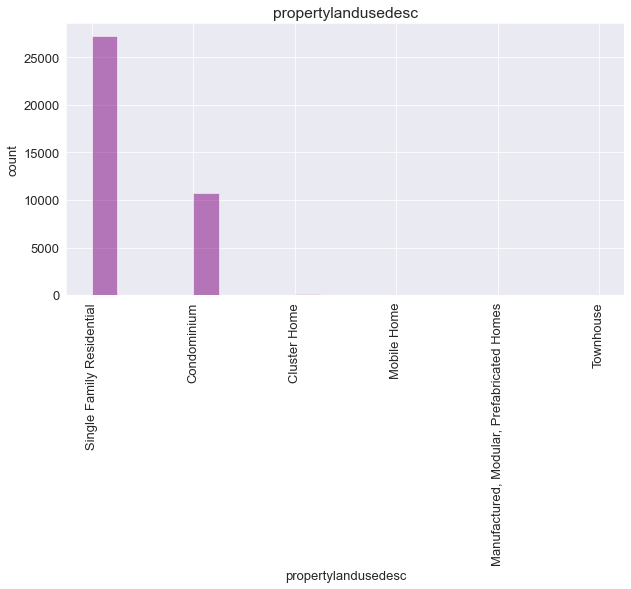

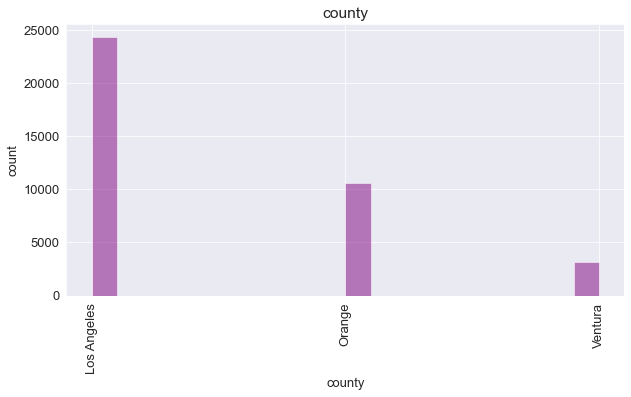

In [7]:
for col in train.columns:
    plt.figure(figsize=(10,5))
    # dark style
    sns.set_style("darkgrid")
    plt.hist(train[col], bins=20, alpha=0.5, label='train', color='purple')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('count')
    # x-axis sideways
    plt.xticks(rotation=90)
    plt.show()
    

Key Takeaways:

- The majority of the features seem to not have a normal distribution except for longitude and calculated_finished_square_feet.

2. Bivariate: 

- Is there a relationship between calculatedfinishedsquarefeet and logerror?
    - calculatedfinishedsquarefeet(continuous) vs logerror(continuous)
    - pearson correlation

- Is there a relationship between home size and logerror?
    - homesize(continuous) vs logerror(continuous)
    - pearson correlation

- Does the logerror score vary by county(fips)?
    - logerror(continuous) vs fips(categorical)
    - two sample, two tail t-test


Is there a relationship between calculatedfinishedsquarefeet and logerror?

- calculatedfinishedsquarefeet(continuous) vs logerror(continuous)
- pearson correlation

In [8]:
# utilize pearsonr function to find the correlation between the variables
corr, p_value = stats.pearsonr(train['logerror'], train['calculatedfinishedsquarefeet'])
print(corr, p_value)

0.02558077815183455 5.81995198737476e-07


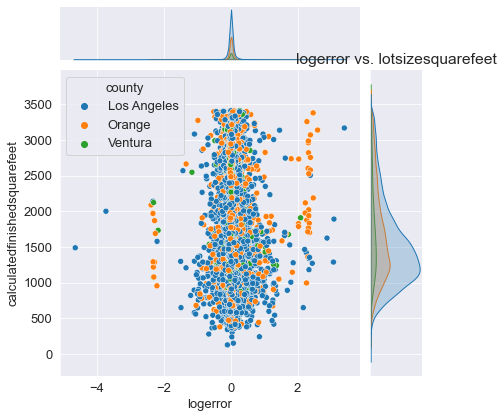

In [9]:
# visualize the correlation between the variables
sns.set_style("darkgrid")
sns.jointplot(x='logerror', y='calculatedfinishedsquarefeet', data=train, hue='county')
plt.title('logerror vs. lotsizesquarefeet')
plt.xlabel('logerror')
plt.ylabel('calculatedfinishedsquarefeet')
plt.show()

Hypothesis Testing:

H0: There is no relationship between lot size and logerror

Ha: There is a relationship between lot size and logerror

In [10]:
# set alpha to 0.05 for hypothesis testing
alpha = 0.05

if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


Key Takeaways:
- calculatedfinishedsquarefeet is correlated with logerror

Is there a relationship between longitude and logerror?

  - longitude(continuous) vs logerror(continuous)
  - pearson correlation

In [11]:
# utilize pearsonr function to find the correlation between the variables
corr, p_value = stats.pearsonr(train['logerror'], train['longitude'])
print(corr, p_value)

0.016146250864202842 0.001611639165567872


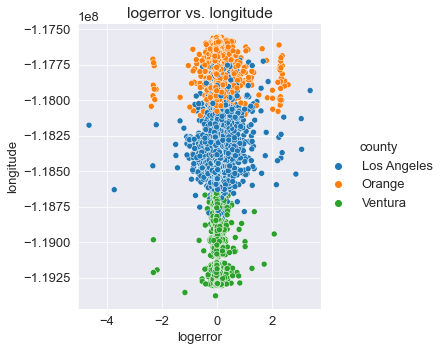

In [12]:
# visualize the correlation between the variables
sns.set_style("darkgrid")
sns.relplot(x='logerror', y='longitude', data=train, hue='county')
plt.title('logerror vs. longitude')
plt.xlabel('logerror')
plt.ylabel('longitude')
plt.show()

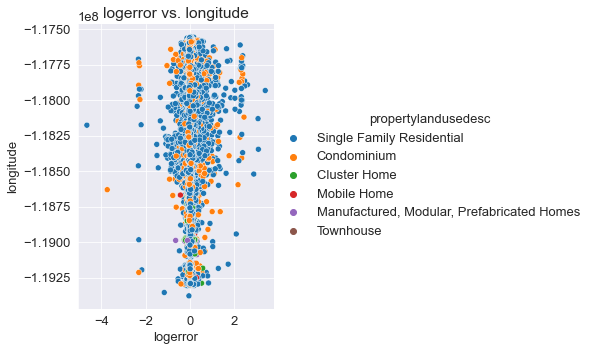

In [13]:
sns.set_style("darkgrid")
sns.relplot(x='logerror', y='longitude', data=train, hue='propertylandusedesc')
plt.title('logerror vs. longitude')
plt.xlabel('logerror')
plt.ylabel('longitude')
plt.show()

Hypothesis Testing:

H0: There is no relationship between longitude and logerror

Ha: There is a relationship between longitude and logerror

In [14]:
# set alpha to 0.05 for hypothesis testing
alpha = 0.05

if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


Key Takeaways:
- longitude is correlated with logerror
- Single family homes and condominiums are correlated LA and Orange County
- Where manufacured homes and mobile homes are correlated with ventura county

Does the logerror score vary by county(fips)?

logerror(continuous) vs fips(categorical)

two sample, two tail t-test

In [15]:
# test the assumption of equal variance
stats.levene(train[train.fips <= 6037].logerror, train[train.fips > 6037].logerror)

LeveneResult(statistic=33.26223935924206, pvalue=8.115189700437785e-09)

In [16]:
# mannwhitneyu test (alternative to levene)
t, p = stats.mannwhitneyu(train[train.fips <= 6037].logerror, train[train.fips > 6037].logerror)
print(t, p)


163405756.0 1.2795036245425495e-05


Hypothesis Testing:

H0: There is no difference between the means of logerror and fips

Ha: There is a difference between the means of logerror and fips

In [17]:
# set alpha to 0.05 for hypothesis testing
alpha = 0.05

if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


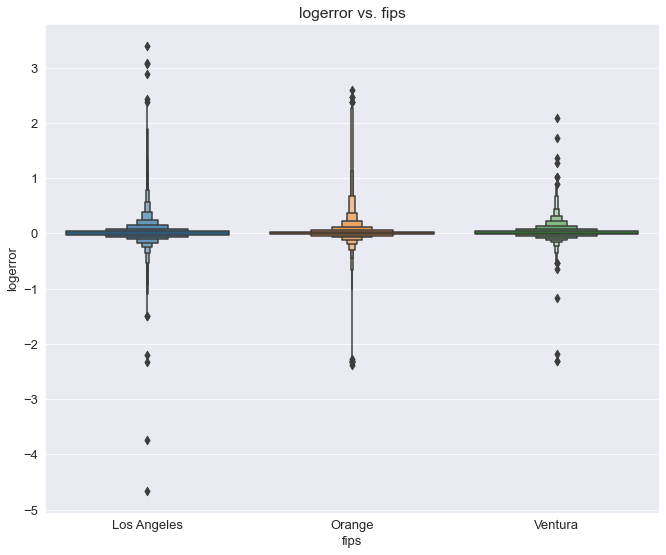

In [18]:
# visualize the distribution of the variables
sns.set_style("darkgrid")
sns.boxenplot(x='county', y='logerror', data=train)
plt.title('logerror vs. fips')
plt.xlabel('fips')
plt.ylabel('logerror')
plt.show()

Key Takeaways:

There is a difference between the means of logerror and fips. This is because the logerror is significantly higher in LA County and Orange County. This is because the logerror is higher in LA County due to the property being located in a more developed area.

5. Multivariate: If we control year built, does the logerror differ by county(fips)?

In [19]:
# describe the yearbuilt
train['yearbuilt'].describe()

count    38150.000000
mean      1968.413840
std         22.738373
min       1882.000000
25%       1953.000000
50%       1969.000000
75%       1986.000000
max       2016.000000
Name: yearbuilt, dtype: float64

In [33]:
# cut the yearbuilt into five bins
train['yearbuilt_bin'] = pd.cut(train['yearbuilt'], bins=[1920, 1940, 1960, 1980, 2000, 2020], labels=['1920-1940' ,'1940-1960', '1960-1980', '1980-2000', '2000-2020'])

In [22]:
# check the data
train.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc,county,yearbuilt_bin
34384,571484,11691632,3.0,4.0,3.0,2408.0,2408.0,6037.0,3.0,34078501.0,...,858864.0,2016.0,550329.0,10501.50,6.037262e+13,-0.003278,2017-05-09,Single Family Residential,Los Angeles,1960-1980
26805,1225639,11089227,3.0,4.0,3.0,2568.0,2568.0,6037.0,3.0,34245675.0,...,155695.0,2016.0,35181.0,2164.53,6.037115e+13,0.012054,2017-04-17,Single Family Residential,Los Angeles,1960-1980
7567,1512494,12085989,3.0,3.0,3.0,1363.0,1363.0,6037.0,3.0,34140966.0,...,192865.0,2016.0,67565.0,2110.20,6.037302e+13,0.042671,2017-02-02,Condominium,Los Angeles,1960-1980
59924,2816463,14632645,2.0,2.0,2.0,876.0,876.0,6059.0,2.0,33646074.0,...,309624.0,2016.0,213349.0,4042.72,6.059032e+13,0.044209,2017-07-24,Condominium,Orange,1980-2000
30023,281348,14531095,2.0,2.0,2.0,1232.0,1232.0,6059.0,2.0,33597686.0,...,1675162.0,2016.0,1457030.0,17925.12,6.059063e+13,0.047554,2017-04-27,Single Family Residential,Orange,1960-1980


In [34]:
train.yearbuilt_bin.value_counts()

1960-1980    11652
1940-1960    10466
1980-2000     8511
2000-2020     3532
1920-1940     3198
Name: yearbuilt_bin, dtype: int64

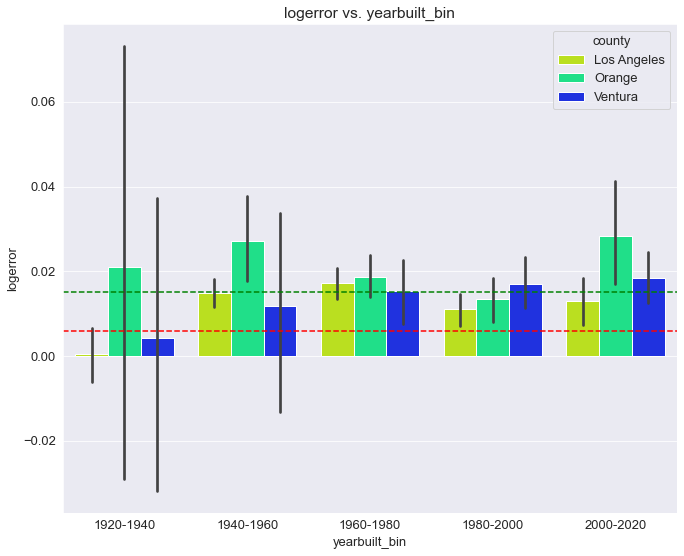

In [35]:
# visualize the distribution of the variables
sns.set_style("darkgrid")
sns.barplot(x='yearbuilt_bin', y='logerror', data=train, hue='county', palette='gist_rainbow')
plt.axhline(y=train.logerror.median(), color='red', linestyle='--')
plt.axhline(y=train.logerror.mean(), color='green', linestyle='--')
plt.title('logerror vs. yearbuilt_bin')
plt.xlabel('yearbuilt_bin')
plt.ylabel('logerror')
plt.show()


If we control year built, does the logerror differ by county(fips)?

Key Takeaways:

- Between the years 1980 and 2000, the logerror is significantly lower.
- Orange County has the highest average logerror
- Ventura County seems to have the most consistent logerror.
- LA County has the lowest average logerror.

Bonus:

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.


In [25]:
# check the fips
train.fips.value_counts()

6037.0    24369
6059.0    10620
6111.0     3161
Name: fips, dtype: int64

In [26]:
# check the county
train.county.value_counts()

Los Angeles    24369
Orange         10620
Ventura         3161
Name: county, dtype: int64

In [27]:
# create a new variable that hold significantly differnt logerror and a variable that holds unique countys
fips_logerror = []
zips = train.county.unique()

In [28]:
# check zips
zips

array(['Los Angeles', 'Orange', 'Ventura'], dtype=object)

In [29]:
# find the logerror mean
logerror_mean = train.logerror.mean()

In [30]:
# create a for loop that will run a ttest between the logerror of the mean of each county to the logerror mean
for zip in zips:
    t, p = stats.ttest_1samp(train[train.county == zip].logerror, logerror_mean)
    if p < alpha:
        fips_logerror.append(zip)

In [31]:
fips_logerror

['Los Angeles', 'Orange']